In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
import joblib

# Load your dataset
df = pd.read_csv('labelled_data.csv')

# Prepare text data
texts = df['Comment Text']
labels = df['Sentiment Label']

# Map the sentiment labels to numerical values
label_mapping = {'NEG': 0, 'NEU': 1, 'POS': 2}
labels = labels.map(label_mapping)

# Split data
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Create TF-IDF vectorizer and Logistic Regression pipeline
pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=1000))

# Train the model with progress bar
with tqdm(total=len(X_train), desc="Training Logistic Regression") as pbar:
    pipeline.fit(X_train, y_train)
    pbar.update(len(X_train))

# Save the trained model
joblib.dump(pipeline, 'logistic_regression_model.pkl')

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

Training Logistic Regression: 100%|██████████| 66324/66324 [00:02<00:00, 24762.23it/s]


              precision    recall  f1-score   support

           0       0.78      0.51      0.62      1045
           1       0.90      0.95      0.92     11197
           2       0.88      0.82      0.85      4339

    accuracy                           0.89     16581
   macro avg       0.85      0.76      0.80     16581
weighted avg       0.89      0.89      0.88     16581



Learning Curves: 100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


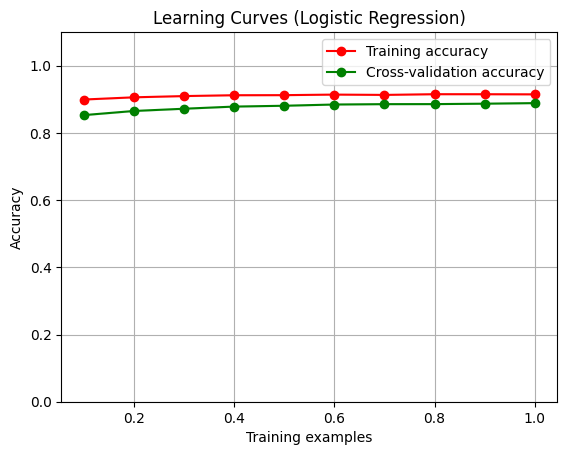

              precision    recall  f1-score   support

           0       0.78      0.51      0.62      1045
           1       0.90      0.95      0.92     11197
           2       0.88      0.82      0.85      4339

    accuracy                           0.89     16581
   macro avg       0.85      0.76      0.80     16581
weighted avg       0.89      0.89      0.88     16581



In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Load your dataset
df = pd.read_csv('labelled_data.csv')

# Prepare text data
texts = df['Comment Text']
labels = df['Sentiment Label']

# Map the sentiment labels to numerical values
label_mapping = {'NEG': 0, 'NEU': 1, 'POS': 2}
labels = labels.map(label_mapping)

# Split data
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Create TF-IDF vectorizer and Logistic Regression pipeline
pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=1000))

# Initialize variables for learning curves
train_sizes = np.linspace(0.1, 1.0, 10)
train_scores = []
test_scores = []

# Generate learning curves with progress bar
for train_size in tqdm(train_sizes, desc="Learning Curves"):
    X_train_subset = X_train[:int(train_size * len(X_train))]
    y_train_subset = y_train[:int(train_size * len(y_train))]
    pipeline.fit(X_train_subset, y_train_subset)
    train_scores.append(pipeline.score(X_train_subset, y_train_subset))
    test_scores.append(pipeline.score(X_test, y_test))

train_scores = np.array(train_scores).reshape(-1, 1)
test_scores = np.array(test_scores).reshape(-1, 1)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure()
plt.title("Learning Curves (Logistic Regression)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.1)
plt.grid()

# Plot the average training and validation accuracy
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation accuracy")

plt.legend(loc="best")
plt.show()

# Train the pipeline on the entire training set
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
